# Basic Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore")

print('All Libraries Imported')

Using TensorFlow backend.


All Libraries Imported


In [2]:
pd.set_option('display.max_colwidth', 2000)

In [3]:
all_data = pd.read_pickle('all_data.pkl')
all_data.reset_index(inplace=True)
all_data.drop(['index'], axis=1, inplace=True)

In [4]:
display(all_data.head())
display(all_data.info())
display(round(all_data.describe(),2))

,Class,Created At,Lemmatized,Sentiment,Sentiment_TextBlob,Sentiment_VADER,Subjectivity,Tweet_Strings,Tweets,cleaned_tweets
0,Luxury,2019-12-13 14:47:03,"[polo, anyone, world, snow, polo, championship, held, december, aspenvalleypoloclub, rwaynelopez, poloevent, stregisaspen, stregishotels, richardmille, stregisresidencesboston, riograndepark, flexjet]",1,0.000000,0.4404,0.0,polo anyone world snow polo championship held december aspenvalleypoloclub rwaynelopez poloevent stregisaspen stregishotels richardmille stregisresidencesboston riograndepark flexjet,Polo anyone?\r\n#StRegis World Snow #Polo Championship will be held on December 18-20 at the #AspenValleyPoloClub.\r\n\r\nhttps://t.co/jz6r5t8YnN\r\n\r\n#RWayneLopez #PoloEvent #StRegis #StRegisAspen #StRegisHotels #RichardMille #StRegisResidencesBoston #RioGrandePark #FlexJet https://t.co/8zWTL21uJL,"[polo, anyone, world, snow, polo, championship, held, december, aspenvalleypoloclub, rwaynelopez, poloevent, stregisaspen, stregishotels, richardmille, stregisresidencesboston, riograndepark, flexjet]"
1,Luxury,2019-12-13 13:05:34,"[fantastic, night, celebrating, th, anniversary]",1,0.400000,0.8074,0.9,fantastic night celebrating th anniversary,Fantastic night at the @TheStRegisMC celebrating is 10th #Anniversary \r\n#StRegis https://t.co/teQWnFtTCn,"[fantastic, night, celebrating, th, anniversary]"
2,Luxury,2019-12-13 09:16:46,"[exceptional, tropical, sunshine, ensures, ultimate, relaxation, st, regis, bali, resort, enjoy, exquisite, vacation, booking, day, advance, information, click, stregisbali, liveexquisite]",1,0.413333,0.8689,0.8,exceptional tropical sunshine ensures ultimate relaxation st regis bali resort enjoy exquisite vacation booking day advance information click stregisbali liveexquisite,"It's the exceptional tropical sunshine that ensures ultimate relaxation at The St. Regis Bali Resort. Enjoy an exquisite vacation with up to 20% off when booking 60 days in advance.\r\n——\r\nFor further information, click: https://t.co/rKK5O4ZBYh\r\n#StRegisBali #StRegis #LiveExquisite https://t.co/3TdmaHYLJP","[exceptional, tropical, sunshine, ensures, ultimate, relaxation, st, regis, bali, resort, enjoy, exquisite, vacation, booking, days, advance, information, click, stregisbali, liveexquisite]"
3,Luxury,2019-12-13 04:05:43,"[birthday, sagittarius, aspen, ilovemylife, happybirthday, velvetbuckaspen]",1,0.000000,0.0000,0.0,birthday sagittarius aspen ilovemylife happybirthday velvetbuckaspen,This is 38. 🎂🏹👀😬🍺🍰💩 @stregisaspen #birthday #🎂 #🍰 #sagittarius #1212 #🏹 #stregis #aspen #ilovemylife #happybirthday #velvetbuckaspen https://t.co/f7ZKRuUjop,"[birthday, sagittarius, aspen, ilovemylife, happybirthday, velvetbuckaspen]"
4,Luxury,2019-12-13 00:14:04,"[stunning, overwater, bar, see, today, called, whale, bar, overwater, lounge, enjoy, delectable, tapa, locally, sourced, seafood, well, hand, picked, wine, spirit, relaxing, eye, mind, body, facing, ocean, madlymaldives]",1,0.341667,0.9359,0.5,stunning overwater bar see today called whale bar overwater lounge enjoy delectable tapa locally sourced seafood well hand picked wine spirit relaxing eye mind body facing ocean madlymaldives,"Stunning overwater bar you will see today! It's called 🐳""Whale Bar""🐳. \r\n\r\nAn overwater lounge where you can enjoy delectable tapas &amp; locally sourced seafood as well as hand-picked wines and spirits while relaxing your eyes, mind, and body facing the ocean.\r\n#StRegis #madlymaldives https://t.co/lqrdk5YsO6","[stunning, overwater, bar, see, today, called, whale, bar, overwater, lounge, enjoy, delectable, tapas, locally, sourced, seafood, well, hand, picked, wines, spirits, relaxing, eyes, mind, body, facing, ocean, madlymaldives]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19936 entries, 0 to 19935
Data columns (total 10 columns):
Class                 19936 non-null object
Created At            19936 non-null object
Lemmatized            19936 non-null object
Sentiment             19936 non-null int64
Sentiment_TextBlob    19936 non-null float64
Sentiment_VADER       19936 non-null float64
Subjectivity          19936 non-null float64
Tweet_Strings         19936 non-null object
Tweets                19936 non-null object
cleaned_tweets        19936 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


None

,Sentiment,Sentiment_TextBlob,Sentiment_VADER,Subjectivity
count,19936.00,19936.00,19936.00,19936.00
mean,0.87,0.18,0.29,0.35
std,0.33,0.31,0.43,0.32
min,0.00,-1.00,-0.97,0.00
25%,1.00,0.00,0.00,0.00
50%,1.00,0.05,0.36,0.35
75%,1.00,0.35,0.64,0.60
max,1.00,1.00,0.99,1.00


In [5]:
rows,cols = all_data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  19936
Number of columns:  10


In [6]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cleaned_tweets,0,0.0
Tweets,0,0.0
Tweet_Strings,0,0.0
Subjectivity,0,0.0
Sentiment_VADER,0,0.0
Sentiment_TextBlob,0,0.0
Sentiment,0,0.0
Lemmatized,0,0.0
Created At,0,0.0
Class,0,0.0


In [7]:
tweets = all_data['Tweet_Strings'] 
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets) 
print('sequences type:', type(sequences))
one_hot_results= tokenizer.texts_to_matrix(tweets, mode='binary')
print('one_hot_results type:', type(one_hot_results))
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('Dimensions of our coded results:', np.shape(one_hot_results))

sequences type: <class 'list'>
one_hot_results type: <class 'numpy.ndarray'>
Found 24545 unique tokens.
Dimensions of our coded results: (19936, 2000)


In [8]:
classes = all_data['Class']

le = LabelEncoder() 
le.fit(classes)
print("Original class labels:")
print(list(le.classes_))
print('\n')
classes_cat = le.transform(classes)  

print('New product labels:')
print(classes_cat)
print('\n')


print('One hot labels; 6 binary columns, one for each of the categories.')
classes_onehot = to_categorical(classes_cat)
print(classes_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(classes_onehot))

Original class labels:
['Booking.com', 'Expedia', 'Luxury', 'Premium', 'Priceline', 'Select']


New product labels:
[2 2 2 ... 0 0 0]


One hot labels; 6 binary columns, one for each of the categories.
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


One hot labels shape:
(19936, 6)


In [9]:
#train_test_split
neural_X_train, neural_X_test, neural_y_train, neural_y_test = train_test_split(one_hot_results,classes_onehot,test_size=0.2, random_state=42)
neural_X_train, neural_X_val, neural_y_train, neural_y_val = train_test_split(neural_X_train,neural_y_train,test_size=0.2, random_state=42)

In [10]:
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [11]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)

In [12]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100050    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 156       
Total params: 101,481
Trainable params: 101,481
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(neural_X_train, #train_test_X
                    neural_y_train, #train_test_y
                    epochs=120,
                    batch_size=256,
                   validation_data=(neural_X_val, neural_y_val))

Train on 12758 samples, validate on 3190 samples
Epoch 1/120
12758/12758 [==============================] - 1s 51us/step - loss: 1.6125 - acc: 0.6406 - val_loss: 1.4589 - val_acc: 0.6765
Epoch 2/120
12758/12758 [==============================] - 0s 38us/step - loss: 1.3498 - acc: 0.6728 - val_loss: 1.2362 - val_acc: 0.6765
Epoch 3/120
12758/12758 [==============================] - 0s 39us/step - loss: 1.1816 - acc: 0.6728 - val_loss: 1.1149 - val_acc: 0.6765
Epoch 4/120
12758/12758 [==============================] - 0s 38us/step - loss: 1.1017 - acc: 0.6728 - val_loss: 1.0618 - val_acc: 0.6765
Epoch 5/120
12758/12758 [==============================] - 1s 96us/step - loss: 1.0673 - acc: 0.6728 - val_loss: 1.0360 - val_acc: 0.6765
Epoch 6/120
12758/12758 [==============================] - 1s 56us/step - loss: 1.0489 - acc: 0.6728 - val_loss: 1.0192 - val_acc: 0.6765
Epoch 7/120
12758/12758 [==============================] - 1s 59us/step - loss: 1.0360 - acc: 0.6728 - val_loss: 1.0064 - v

12758/12758 [==============================] - 1s 42us/step - loss: 0.6182 - acc: 0.7942 - val_loss: 0.6459 - val_acc: 0.7878
Epoch 118/120
12758/12758 [==============================] - 1s 53us/step - loss: 0.6164 - acc: 0.7941 - val_loss: 0.6452 - val_acc: 0.7890
Epoch 119/120
12758/12758 [==============================] - 1s 49us/step - loss: 0.6146 - acc: 0.7954 - val_loss: 0.6446 - val_acc: 0.7893
Epoch 120/120
12758/12758 [==============================] - 1s 49us/step - loss: 0.6129 - acc: 0.7962 - val_loss: 0.6435 - val_acc: 0.7887


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

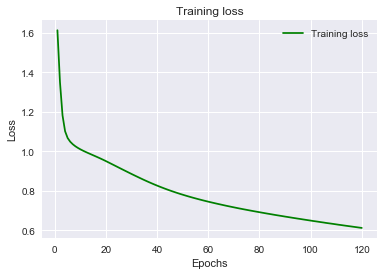

In [15]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

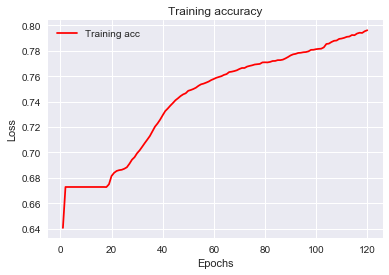

In [16]:
acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
y_hat_test = model.predict(neural_X_test)

In [18]:
results_train = model.evaluate(neural_X_train, neural_y_train)
results_train

12758/12758 [==============================] - 0s 32us/step


[0.6110402048895549, 0.7965982129234078]

In [19]:
results_test = model.evaluate(neural_X_test, neural_y_test)
results_test

3988/3988 [==============================] - 0s 34us/step


[0.6394471156680835, 0.7978936810431294]

In [20]:
model.save('all_data_network.h5')